In [1]:
# simple neural network to classify handwritten digits 
# what do we know so far: we have to classify grayscale images on handwritten digits of size (28, 28)pixels into 10 categories (i.e 0 through 9).
#Use MNIST dataset - it has 60,000 training images, 10,000 test images put together by National Institute of Standards and Tech 1980s


# Import necessary libraries

In [1]:
# importing and loading the MNIST dataset in Keras
from keras.datasets import mnist

# here's the network architecture
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

#import other useful lib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for reproducibility
np.random.seed(1671) 

/Users/Mitul/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Explore and visualize data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
#train_images-used for fine-tuning our network
#test_images used for assessing the performance
#train_label, test_lables consists of true labels

# images are read as numpy arrays and labels as an array of digits from 0-9
#let's check out the data
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


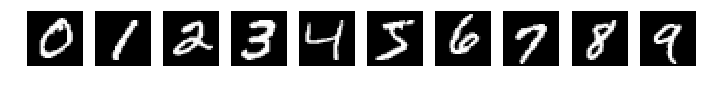

In [3]:
unique_lables = set(train_labels)
plt.figure(figsize=(12,12))

i=1
for label in unique_lables:
    image = train_images[train_labels.tolist().index(label)]
    plt.subplot(10,10,i)
    plt.axis('off')
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

# Preprocess data 

In [4]:
print('training_label: ', train_labels.shape)
print('test_labels: ',test_labels.shape)
print('test_image: ', test_images.shape)

training_label:  (60000,)
test_labels:  (10000,)
test_image:  (10000, 28, 28)


In [5]:
#preparing the image data: Data is converted into float32 for supporting GPU computation and normalized to [0, 1] 
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [6]:
# prepare the labels: convert class vectors to binary class matrices
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Usual DL workflow: 
# we have an input so feed the NN the training data -> NN learn to associate images and labels from training dataset
# Onces the model is training, use the model to predict on the test_images and verify prediction with the test_labels

# Build Multi-layer perceptrons

In [7]:
model= Sequential()

In [13]:
model.add(Dense(512, activation='relu',input_shape=(28 * 28, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
#layer, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. 
# in our network we have 2 dense layers which are densely connected (known as fully connected) neural layers
# The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing
#to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Compile and fit the data to the model

In [15]:
# compilation step
# Here we have a loss fct that measures the performance of the model on the training set, an optimizer to update weights
# based on the data and loss fct and finaly a metric to accuracy on the test and training set
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
### train network
history = model.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 174us/step - loss: 0.2469 - acc: 0.9239 - val_loss: 0.1288 - val_acc: 0.9605
Epoch 2/20
48000/48000 [==============================] - 7s 149us/step - loss: 0.0891 - acc: 0.9722 - val_loss: 0.0825 - val_acc: 0.9739
Epoch 3/20
48000/48000 [==============================] - 8s 162us/step - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0866 - val_acc: 0.9759
Epoch 4/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.0388 - acc: 0.9877 - val_loss: 0.0861 - val_acc: 0.9781
Epoch 5/20
48000/48000 [==============================] - 6s 135us/step - loss: 0.0299 - acc: 0.9906 - val_loss: 0.1030 - val_acc: 0.9743
Epoch 6/20
48000/48000 [==============================] - 7s 139us/step - loss: 0.0228 - acc: 0.9926 - val_loss: 0.1008 - val_acc: 0.9789
Epoch 7/20
48000/48000 [==============================] - 7s 139us/step - loss: 0.0175 - acc: 0.9939 - val_loss: 0.1118 - 

# Prediction and validate the model

In [17]:
# we have 99.9% accuracy over the training data, 99% over validation data 
# lets check the model performance on the test set
test_loss, test_acc = model.evaluate(test_images,test_labels) #This is used to compute the loss values
print('\ntest_acc: ',test_acc)
print('test_loss: ',test_loss)

10000/10000 [==============================] - 1s 93us/step

test_acc:  0.9805
test_loss:  0.1451119137159366


In [12]:
# test_acc of 98% which is lower than the train_acc -> overfitting
#network trained on 48,000 samples, 
#12,000 are reserved for validation. Once the neural model is built, it is then tested on 10,000 samples

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


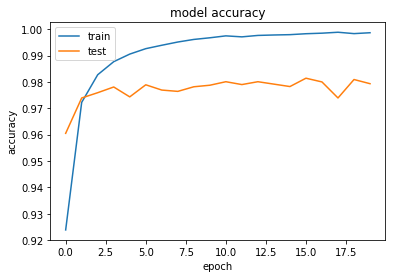

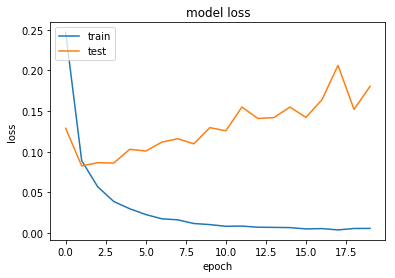

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()